In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 

df = pd.read_csv('./data/df.csv',sep=',')
df  = df.sort_values(by='time',ascending=True).reset_index(drop=True)

BATCHSIZE = 256
LOOKBACK = 100


date = ["2024-02-19",
"2024-03-15",
"2024-04-19",
"2024-05-17",
"2024-06-21",
"2024-07-19",
"2024-08-16",
"2024-09-20",
"2024-10-18",
"2024-11-15",
"2024-12-20",
"2025-01-17"]
df.head()

df['time'] = pd.to_datetime(df['time'])
df['date'] = df['time'].dt.date
df['date'] = df['date'].astype(str)
df['hour'] = df['time'].dt.hour
df['minute'] = df['time'].dt.minute 
# for i in range(1,5):
#     df[f'spread_shift_{i}'] = df.groupby(['hour','minute'])['spread'].shift(i)

df['Expiration_Date'] = df['date'].apply(lambda x: 1 if x in date else 0)
# df.fillna(0,inplace=True)


df.dropna(inplace=True)

df.head()


def process_data():
    df = pd.read_csv('./data/df.csv',sep=',')
    df  = df.sort_values(by='time',ascending=True).reset_index(drop=True)

    # BATCHSIZE = 256
    # LOOKBACK = 100


    date = ["2024-02-19",
    "2024-03-15",
    "2024-04-19",
    "2024-05-17",
    "2024-06-21",
    "2024-07-19",
    "2024-08-16",
    "2024-09-20",
    "2024-10-18",
    "2024-11-15",
    "2024-12-20",
    "2025-01-17"]
    df.head()

    df['time'] = pd.to_datetime(df['time'])
    df['date'] = df['time'].dt.date
    df['date'] = df['date'].astype(str)
    df['hour'] = df['time'].dt.hour
    df['minute'] = df['time'].dt.minute 
    # for i in range(1,5):
    #     df[f'spread_shift_{i}'] = df.groupby(['hour','minute'])['spread'].shift(i)

    df['Expiration_Date'] = df['date'].apply(lambda x: 1 if x in date else 0)
    # df.fillna(0,inplace=True)


    df.dropna(inplace=True)

    df.head()
    return df 


In [2]:
df[df["date"]=='2025-01-17']

,time,IF00_close,IF01_close,spread,date,hour,minute,Expiration_Date
57117,2025-01-17 09:30:00,3786.8,3788.0,1.2,2025-01-17,9,30,1
57118,2025-01-17 09:31:00,3791.6,3789.6,-2.0,2025-01-17,9,31,1
57119,2025-01-17 09:32:00,3792.2,3791.8,-0.4,2025-01-17,9,32,1
57120,2025-01-17 09:33:00,3791.2,3788.2,-3.0,2025-01-17,9,33,1
57121,2025-01-17 09:34:00,3794.0,3792.2,-1.8,2025-01-17,9,34,1
...,...,...,...,...,...,...,...,...
57353,2025-01-17 14:56:00,3818.8,3810.6,-8.2,2025-01-17,14,56,1
57354,2025-01-17 14:57:00,3818.8,3810.8,-8.0,2025-01-17,14,57,1
57355,2025-01-17 14:58:00,3819.0,3809.4,-9.6,2025-01-17,14,58,1
57356,2025-01-17 14:59:00,3818.8,3807.4,-11.4,2025-01-17,14,59,1


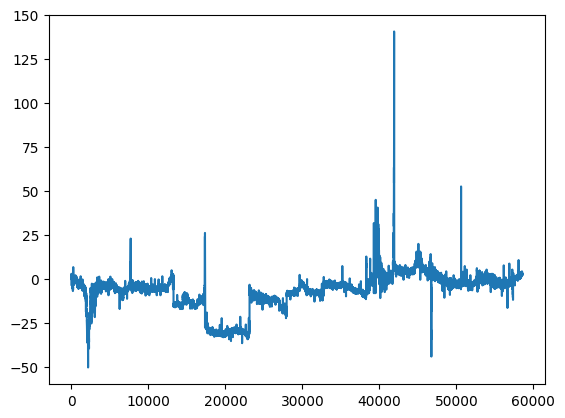

In [3]:

timeseries = df[["spread"]].values.astype('float32')

plt.plot(timeseries[:,0])
plt.show()

In [4]:
# train-test split for time series



import torch

def create_dataset(dataset, lookback,split_index):
    """Transform a time series into a prediction dataset

    Args:
        dataset: A numpy array of time series, first dimension is the time steps
        lookback: Size of window for prediction
    """


    X_train, y_train = [], []
    X_test, y_test = [], []
    for i in range(len(dataset)-lookback):
        if i < split_index:
            feature = dataset[i:i+lookback]
            target = dataset[i+lookback:i+lookback+1][:,0:1]
            X_train.append(feature)
            y_train.append(target)
        else:
            feature = dataset[i:i+lookback]
            target = dataset[i+lookback:i+lookback+1][:,0:1]
            X_test.append(feature)
            y_test.append(target)
    # X = np.array(X)
    # y = np.array(y)
    return torch.tensor(X_train), torch.tensor(y_train),torch.tensor(X_test), torch.tensor(y_test)





In [5]:
for i in range(100,1000,10):
    print(i) 

100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990


In [6]:
# train_size = int(len(timeseries) * 0.67)
# test_size = len(timeseries) - train_size
# train, test = timeseries[:train_size], timeseries[train_size:]
# lookback = LOOKBACK 
# X_train_all, y_train_all = create_dataset(train, lookback=lookback)
# X_test, y_test = create_dataset(test, lookback=lookback)
# print(X_train_all.shape, y_train_all.shape)
# print(X_test.shape, y_test.shape)

# indices = np.arange(len(X_train_all))   
# np.random.shuffle(indices)
# train_val_size = int(len(X_train_all) * 0.8)
# train_indices = indices[:train_val_size]
# val_indices = indices[train_val_size:]
# X_train = X_train_all[train_indices]
# y_train = y_train_all[train_indices]
# X_val = X_train_all[val_indices]
# y_val = y_train_all[val_indices]

# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# X_train = X_train.to(device)
# y_train = y_train.to(device)
# X_val = X_val.to(device)
# y_val = y_val.to(device)
# X_test = X_test.to(device)
# y_test = y_test.to(device)


In [7]:
import torch
import torch.nn as nn
import numpy as np

class DeepTrendDecomposer(nn.Module):
    def __init__(self, window_size=5):
        super().__init__()
        # 使用大窗口卷积捕获低频趋势
        self.trend_extractor = nn.Sequential(
            nn.Conv1d(in_channels=1, out_channels=16, kernel_size=window_size, padding='same'),
            nn.ReLU(),
            nn.Conv1d(16, 1, kernel_size=window_size, padding='same')
        )
        
    def forward(self, x):
        # 输入形状: (batch_size, seq_len)
        x = x.permute(0,2,1)  # 添加通道维度 -> (B, 1, T)
        # print(x.shape)
        trend = self.trend_extractor(x)  # (B, 1, T)
        residual = x - trend
        return trend, residual

# # 使用示例
# model = DeepTrendDecomposer(window_size=7)
# input_seq = torch.randn(32, 100)  # batch_size=32, seq_len=100
# trend, residual = model(input_seq)


In [8]:
# trend.shape 

In [9]:
class EarlyStopping:
    def __init__(self, patience=7, min_delta=0, verbose=False):
        """
        Early stopping to stop the training when the loss does not improve after
        certain epochs.
        
        Args:
            patience (int): How many epochs to wait before stopping when loss is
                           not improving
            min_delta (float): Minimum change in the monitored quantity to
                             qualify as an improvement
            verbose (bool): If True, prints a message for each validation loss improvement
        """
        self.patience = patience
        self.min_delta = min_delta
        self.verbose = verbose
        self.counter = 0
        self.best_loss = None
        self.early_stop = False
        self.val_loss_min = float('inf')
        
    def __call__(self, val_loss, model, optimizer, epoch):
        if self.best_loss is None:
            self.best_loss = val_loss
            self.save_checkpoint(val_loss, model, optimizer, epoch)
        elif val_loss > self.best_loss + self.min_delta:
            self.counter += 1
            if self.verbose:
                print(f'EarlyStopping counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_loss = val_loss
            self.save_checkpoint(val_loss, model, optimizer, epoch)
            self.counter = 0
            
    def save_checkpoint(self, val_loss, model, optimizer, epoch):
        """Saves model when validation loss decreases."""
        if self.verbose:
            print(f'Validation loss decreased ({self.val_loss_min:.6f} --> {val_loss:.6f}). Saving model ...')
        torch.save(model.state_dict(), 'checkpoint.pt')
        self.val_loss_min = val_loss

In [10]:


class TrendAwareLSTM(nn.Module):
    def __init__(self, input_size=1, hidden_size=50):
        super().__init__()
        self.decomposer =  DeepTrendDecomposer(window_size=7)
        self.lstm = nn.LSTM(input_size, hidden_size)
        self.linear = nn.Linear(hidden_size, 1)


    def forward(self, x):
        # 分解趋势
        trend, residual = self.decomposer(x)
        # print(trend.shape,residual.shape)
        
        # 用LSTM预测残差
        trend = trend.permute(0,2,1)
        residual = residual.permute(0,2,1)
        # residual = residual.unsqueeze(-1)  # (B, T, 1)
        lstm_out, _ = self.lstm(residual)
        pred_residual = self.linear(lstm_out[:, -1, :])
        
        # 预测趋势（简单移动平均）
        pred_trend = trend[:, -1].unsqueeze(-1)  # 假设趋势缓慢变化
        
        return pred_trend + pred_residual
# model = TrendAwareLSTM().to(device)
# model 

# sum(para.numel() for para in model.parameters())

In [11]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = TrendAwareLSTM().to(device)
model 

sum(para.numel() for para in model.parameters())

10892

In [16]:
split_index = 39237
lookback = LOOKBACK 
X_train_all, y_train_all,X_test, y_test = create_dataset(timeseries, lookback=lookback,split_index=split_index)
# X_test, y_test = create_dataset(test, lookback=lookback)
print(X_train_all.shape, y_train_all.shape)
print(X_test.shape, y_test.shape)

indices = np.arange(len(X_train_all))   
np.random.shuffle(indices)
train_val_size = int(len(X_train_all) * 0.8)
train_indices = indices[:train_val_size]
val_indices = indices[train_val_size:]
X_train = X_train_all[train_indices]
y_train = y_train_all[train_indices]
X_val = X_train_all[val_indices]
y_val = y_train_all[val_indices]

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

X_train = X_train.to(device)
y_train = y_train.to(device)
X_val = X_val.to(device)
y_val = y_val.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

C:\Users\gaoxc\AppData\Local\Temp\ipykernel_20220\3913454685.py:31: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at C:\cb\pytorch_1000000000000\work\torch\csrc\utils\tensor_new.cpp:278.)
  return torch.tensor(X_train), torch.tensor(y_train),torch.tensor(X_test), torch.tensor(y_test)


torch.Size([39237, 100, 1]) torch.Size([39237, 1, 1])
torch.Size([19226, 100, 1]) torch.Size([19226, 1, 1])


In [18]:
trend,redisual = model.decomposer(X_train)



In [21]:
trend.shape 
X_train.shape 


torch.Size([31389, 100, 1])

: 

In [12]:
import numpy as np
import torch.optim as optim
import torch.utils.data as data
import time 
begin_time = time.time()
df_result = pd.DataFrame()

for split_index in range(39237,51637,100): #, len(timeseries)
    train_size = split_index # 
    # test_size = len(timeseries) - train_size
    # train, test = timeseries[:train_size], timeseries[train_size:]
    lookback = LOOKBACK 
    X_train_all, y_train_all,X_test, y_test = create_dataset(timeseries, lookback=lookback,split_index=split_index)
    # X_test, y_test = create_dataset(test, lookback=lookback)
    print(X_train_all.shape, y_train_all.shape)
    print(X_test.shape, y_test.shape)

    indices = np.arange(len(X_train_all))   
    np.random.shuffle(indices)
    train_val_size = int(len(X_train_all) * 0.8)
    train_indices = indices[:train_val_size]
    val_indices = indices[train_val_size:]
    X_train = X_train_all[train_indices]
    y_train = y_train_all[train_indices]
    X_val = X_train_all[val_indices]
    y_val = y_train_all[val_indices]

    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

    X_train = X_train.to(device)
    y_train = y_train.to(device)
    X_val = X_val.to(device)
    y_val = y_val.to(device)
    X_test = X_test.to(device)
    y_test = y_test.to(device)

    model = TrendAwareLSTM().to(device)
    model 


    optimizer = optim.Adam(model.parameters())
    loss_fn = nn.MSELoss()
    loader = data.DataLoader(data.TensorDataset(X_train, y_train), shuffle=True, batch_size=BATCHSIZE)
    early_stopping = EarlyStopping(patience=10, min_delta=0.001)
    n_epochs = 1000
    for epoch in range(n_epochs):
        model.train()
        for X_batch, y_batch in loader:
            # print(X_batch.shape)
            # X_batch = X_batch.to(device)
            # y_batch = y_batch.to(device)
            y_pred = model(X_batch)
            y_pred_val = model(X_val)
            # print(y_pred.shape,y_batch.shape)
            loss_train = loss_fn(y_pred, y_batch)
            
            optimizer.zero_grad()
            loss_train.backward()
            optimizer.step()
        # Validation
        loss_val = loss_fn(y_pred_val, y_val)
        early_stopping(loss_val, model, optimizer, epoch)

        if early_stopping.early_stop:
            print("Early stopping")
            break

    model.eval()
    with torch.no_grad():
        # X_train = X_train.to(device)
        # y_train = y_train.to(device)
        y_pred_train = model(X_train)
        # X_test = X_test.to(device)
        # y_test = y_test.to(device)
        train_rmse = torch.sqrt(loss_fn(y_pred_train, y_train))
        y_pred_test = model(X_test)
        test_rmse = torch.sqrt(loss_fn(y_pred_test, y_test))
    print("Epoch %d: train RMSE %.4f, test RMSE %.4f" % (epoch, train_rmse, test_rmse))
    end_time = time.time()
    print(f"训练时间: {end_time - begin_time} 秒")

    predict_value = model(X_test[0,:,:].unsqueeze(0))
    predict_value = predict_value.detach().cpu().numpy().flatten()


    df_result_tmp = pd.DataFrame([[split_index, predict_value[0],y_test[0].flatten().cpu().numpy()[0]]],columns=['split_index','predict','true'])
    df_result_tmp
    # df_result = pd.concat([df_result,df_result_tmp],ignore_index=True)
    df_result_tmp.to_csv(f'./data/lstm_with_trends_result_{LOOKBACK}.csv',index=False,mode='a')
    
    del model
    del optimizer
    del loader
    del early_stopping
    del X_train
    del y_train
    del X_train_all
    del y_train_all
    del X_val
    del y_val
    del X_test
    del y_test
    del y_pred_train
    del y_pred_test
    del y_pred_val
    del y_pred
    del y_batch
    del X_batch
    torch.cuda.empty_cache()
    

C:\Users\gaoxc\AppData\Local\Temp\ipykernel_28816\3913454685.py:31: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at C:\cb\pytorch_1000000000000\work\torch\csrc\utils\tensor_new.cpp:278.)
  return torch.tensor(X_train), torch.tensor(y_train),torch.tensor(X_test), torch.tensor(y_test)


torch.Size([39237, 100, 1]) torch.Size([39237, 1, 1])
torch.Size([19226, 100, 1]) torch.Size([19226, 1, 1])


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([256, 1, 1])) that is different to the input size (torch.Size([256, 256, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([157, 1, 1])) that is different to the input size (torch.Size([157, 157, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reductio

Early stopping


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([31389, 1, 1])) that is different to the input size (torch.Size([31389, 31389, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([19226, 1, 1])) that is different to the input size (torch.Size([19226, 19226, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 85: train RMSE 0.7998, test RMSE 1.7490
训练时间: 121.9569923877716 秒
torch.Size([39337, 100, 1]) torch.Size([39337, 1, 1])
torch.Size([19126, 100, 1]) torch.Size([19126, 1, 1])


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([237, 1, 1])) that is different to the input size (torch.Size([237, 237, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([7868, 1, 1])) that is different to the input size (torch.Size([7868, 7868, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Early stopping


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([31469, 1, 1])) that is different to the input size (torch.Size([31469, 31469, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([19126, 1, 1])) that is different to the input size (torch.Size([19126, 19126, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 23: train RMSE 0.8249, test RMSE 1.6453
训练时间: 159.3747205734253 秒
torch.Size([39437, 100, 1]) torch.Size([39437, 1, 1])
torch.Size([19026, 100, 1]) torch.Size([19026, 1, 1])


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([61, 1, 1])) that is different to the input size (torch.Size([61, 61, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([7888, 1, 1])) that is different to the input size (torch.Size([7888, 7888, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Early stopping


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([31549, 1, 1])) that is different to the input size (torch.Size([31549, 31549, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([19026, 1, 1])) that is different to the input size (torch.Size([19026, 19026, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 14: train RMSE 0.8828, test RMSE 1.5006
训练时间: 184.55409812927246 秒
torch.Size([39537, 100, 1]) torch.Size([39537, 1, 1])
torch.Size([18926, 100, 1]) torch.Size([18926, 1, 1])


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([141, 1, 1])) that is different to the input size (torch.Size([141, 141, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([7908, 1, 1])) that is different to the input size (torch.Size([7908, 7908, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Early stopping


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([31629, 1, 1])) that is different to the input size (torch.Size([31629, 31629, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([18926, 1, 1])) that is different to the input size (torch.Size([18926, 18926, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 88: train RMSE 0.9042, test RMSE 1.6546
训练时间: 311.6753761768341 秒
torch.Size([39637, 100, 1]) torch.Size([39637, 1, 1])
torch.Size([18826, 100, 1]) torch.Size([18826, 1, 1])


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([221, 1, 1])) that is different to the input size (torch.Size([221, 221, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([7928, 1, 1])) that is different to the input size (torch.Size([7928, 7928, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Early stopping


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([31709, 1, 1])) that is different to the input size (torch.Size([31709, 31709, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([18826, 1, 1])) that is different to the input size (torch.Size([18826, 18826, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 26: train RMSE 0.9377, test RMSE 1.4719
训练时间: 353.80269980430603 秒
torch.Size([39737, 100, 1]) torch.Size([39737, 1, 1])
torch.Size([18726, 100, 1]) torch.Size([18726, 1, 1])


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([45, 1, 1])) that is different to the input size (torch.Size([45, 45, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([7948, 1, 1])) that is different to the input size (torch.Size([7948, 7948, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Early stopping


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([31789, 1, 1])) that is different to the input size (torch.Size([31789, 31789, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([18726, 1, 1])) that is different to the input size (torch.Size([18726, 18726, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 15: train RMSE 0.9131, test RMSE 1.4508
训练时间: 380.7296075820923 秒
torch.Size([39837, 100, 1]) torch.Size([39837, 1, 1])
torch.Size([18626, 100, 1]) torch.Size([18626, 1, 1])


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([125, 1, 1])) that is different to the input size (torch.Size([125, 125, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([7968, 1, 1])) that is different to the input size (torch.Size([7968, 7968, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Early stopping


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([31869, 1, 1])) that is different to the input size (torch.Size([31869, 31869, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([18626, 1, 1])) that is different to the input size (torch.Size([18626, 18626, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 77: train RMSE 0.9448, test RMSE 1.4203
训练时间: 494.5555431842804 秒
torch.Size([39937, 100, 1]) torch.Size([39937, 1, 1])
torch.Size([18526, 100, 1]) torch.Size([18526, 1, 1])


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([205, 1, 1])) that is different to the input size (torch.Size([205, 205, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([7988, 1, 1])) that is different to the input size (torch.Size([7988, 7988, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Early stopping


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([31949, 1, 1])) that is different to the input size (torch.Size([31949, 31949, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([18526, 1, 1])) that is different to the input size (torch.Size([18526, 18526, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 56: train RMSE 0.8748, test RMSE 1.4117
训练时间: 579.3280551433563 秒
torch.Size([40037, 100, 1]) torch.Size([40037, 1, 1])
torch.Size([18426, 100, 1]) torch.Size([18426, 1, 1])


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([29, 1, 1])) that is different to the input size (torch.Size([29, 29, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([8008, 1, 1])) that is different to the input size (torch.Size([8008, 8008, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Early stopping


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([32029, 1, 1])) that is different to the input size (torch.Size([32029, 32029, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([18426, 1, 1])) that is different to the input size (torch.Size([18426, 18426, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 74: train RMSE 1.0098, test RMSE 1.4943
训练时间: 691.8187170028687 秒
torch.Size([40137, 100, 1]) torch.Size([40137, 1, 1])
torch.Size([18326, 100, 1]) torch.Size([18326, 1, 1])


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([109, 1, 1])) that is different to the input size (torch.Size([109, 109, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([8028, 1, 1])) that is different to the input size (torch.Size([8028, 8028, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Early stopping


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([32109, 1, 1])) that is different to the input size (torch.Size([32109, 32109, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([18326, 1, 1])) that is different to the input size (torch.Size([18326, 18326, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 79: train RMSE 0.9270, test RMSE 1.3568
训练时间: 810.704357624054 秒
torch.Size([40237, 100, 1]) torch.Size([40237, 1, 1])
torch.Size([18226, 100, 1]) torch.Size([18226, 1, 1])


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([189, 1, 1])) that is different to the input size (torch.Size([189, 189, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([8048, 1, 1])) that is different to the input size (torch.Size([8048, 8048, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Early stopping


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([32189, 1, 1])) that is different to the input size (torch.Size([32189, 32189, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([18226, 1, 1])) that is different to the input size (torch.Size([18226, 18226, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 13: train RMSE 0.9433, test RMSE 1.3677
训练时间: 835.6264343261719 秒
torch.Size([40337, 100, 1]) torch.Size([40337, 1, 1])
torch.Size([18126, 100, 1]) torch.Size([18126, 1, 1])


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([13, 1, 1])) that is different to the input size (torch.Size([13, 13, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([8068, 1, 1])) that is different to the input size (torch.Size([8068, 8068, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Early stopping


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([32269, 1, 1])) that is different to the input size (torch.Size([32269, 32269, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([18126, 1, 1])) that is different to the input size (torch.Size([18126, 18126, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 87: train RMSE 0.9919, test RMSE 1.3295
训练时间: 963.388955116272 秒
torch.Size([40437, 100, 1]) torch.Size([40437, 1, 1])
torch.Size([18026, 100, 1]) torch.Size([18026, 1, 1])


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([93, 1, 1])) that is different to the input size (torch.Size([93, 93, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([8088, 1, 1])) that is different to the input size (torch.Size([8088, 8088, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Early stopping


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([32349, 1, 1])) that is different to the input size (torch.Size([32349, 32349, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([18026, 1, 1])) that is different to the input size (torch.Size([18026, 18026, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 51: train RMSE 0.9434, test RMSE 1.3191
训练时间: 1038.9357051849365 秒
torch.Size([40537, 100, 1]) torch.Size([40537, 1, 1])
torch.Size([17926, 100, 1]) torch.Size([17926, 1, 1])


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([173, 1, 1])) that is different to the input size (torch.Size([173, 173, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([8108, 1, 1])) that is different to the input size (torch.Size([8108, 8108, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Early stopping


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([32429, 1, 1])) that is different to the input size (torch.Size([32429, 32429, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([17926, 1, 1])) that is different to the input size (torch.Size([17926, 17926, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 74: train RMSE 0.9938, test RMSE 1.3990
训练时间: 1148.1618700027466 秒
torch.Size([40637, 100, 1]) torch.Size([40637, 1, 1])
torch.Size([17826, 100, 1]) torch.Size([17826, 1, 1])


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([253, 1, 1])) that is different to the input size (torch.Size([253, 253, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([8128, 1, 1])) that is different to the input size (torch.Size([8128, 8128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Early stopping


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([32509, 1, 1])) that is different to the input size (torch.Size([32509, 32509, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([17826, 1, 1])) that is different to the input size (torch.Size([17826, 17826, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 70: train RMSE 0.9937, test RMSE 1.3516
训练时间: 1253.6961860656738 秒
torch.Size([40737, 100, 1]) torch.Size([40737, 1, 1])
torch.Size([17726, 100, 1]) torch.Size([17726, 1, 1])


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([77, 1, 1])) that is different to the input size (torch.Size([77, 77, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([8148, 1, 1])) that is different to the input size (torch.Size([8148, 8148, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Early stopping


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([32589, 1, 1])) that is different to the input size (torch.Size([32589, 32589, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([17726, 1, 1])) that is different to the input size (torch.Size([17726, 17726, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 15: train RMSE 0.9906, test RMSE 1.3777
训练时间: 1285.5027451515198 秒
torch.Size([40837, 100, 1]) torch.Size([40837, 1, 1])
torch.Size([17626, 100, 1]) torch.Size([17626, 1, 1])


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([8168, 1, 1])) that is different to the input size (torch.Size([8168, 8168, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Early stopping


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([32669, 1, 1])) that is different to the input size (torch.Size([32669, 32669, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([17626, 1, 1])) that is different to the input size (torch.Size([17626, 17626, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 214: train RMSE 0.9578, test RMSE 1.3408
训练时间: 1610.4906933307648 秒
torch.Size([40937, 100, 1]) torch.Size([40937, 1, 1])
torch.Size([17526, 100, 1]) torch.Size([17526, 1, 1])


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([8188, 1, 1])) that is different to the input size (torch.Size([8188, 8188, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Early stopping


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([32749, 1, 1])) that is different to the input size (torch.Size([32749, 32749, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([17526, 1, 1])) that is different to the input size (torch.Size([17526, 17526, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 16: train RMSE 1.0143, test RMSE 1.3441
训练时间: 1641.2100501060486 秒
torch.Size([41037, 100, 1]) torch.Size([41037, 1, 1])
torch.Size([17426, 100, 1]) torch.Size([17426, 1, 1])


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([8208, 1, 1])) that is different to the input size (torch.Size([8208, 8208, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Early stopping


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([32829, 1, 1])) that is different to the input size (torch.Size([32829, 32829, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([17426, 1, 1])) that is different to the input size (torch.Size([17426, 17426, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 108: train RMSE 0.9934, test RMSE 1.3166
训练时间: 1816.6482467651367 秒
torch.Size([41137, 100, 1]) torch.Size([41137, 1, 1])
torch.Size([17326, 100, 1]) torch.Size([17326, 1, 1])


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([8228, 1, 1])) that is different to the input size (torch.Size([8228, 8228, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Early stopping


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([32909, 1, 1])) that is different to the input size (torch.Size([32909, 32909, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([17326, 1, 1])) that is different to the input size (torch.Size([17326, 17326, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 31: train RMSE 1.0147, test RMSE 1.3715
训练时间: 1872.074704170227 秒
torch.Size([41237, 100, 1]) torch.Size([41237, 1, 1])
torch.Size([17226, 100, 1]) torch.Size([17226, 1, 1])


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([8248, 1, 1])) that is different to the input size (torch.Size([8248, 8248, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Early stopping


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([32989, 1, 1])) that is different to the input size (torch.Size([32989, 32989, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([17226, 1, 1])) that is different to the input size (torch.Size([17226, 17226, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 21: train RMSE 1.0285, test RMSE 1.3550
训练时间: 1916.303551197052 秒
torch.Size([41337, 100, 1]) torch.Size([41337, 1, 1])
torch.Size([17126, 100, 1]) torch.Size([17126, 1, 1])


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([8268, 1, 1])) that is different to the input size (torch.Size([8268, 8268, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Early stopping


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([33069, 1, 1])) that is different to the input size (torch.Size([33069, 33069, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([17126, 1, 1])) that is different to the input size (torch.Size([17126, 17126, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 104: train RMSE 1.0100, test RMSE 1.3127
训练时间: 2084.136412382126 秒
torch.Size([41437, 100, 1]) torch.Size([41437, 1, 1])
torch.Size([17026, 100, 1]) torch.Size([17026, 1, 1])


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([8288, 1, 1])) that is different to the input size (torch.Size([8288, 8288, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Early stopping


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([33149, 1, 1])) that is different to the input size (torch.Size([33149, 33149, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([17026, 1, 1])) that is different to the input size (torch.Size([17026, 17026, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 48: train RMSE 1.0148, test RMSE 1.3529
训练时间: 2165.580565214157 秒
torch.Size([41537, 100, 1]) torch.Size([41537, 1, 1])
torch.Size([16926, 100, 1]) torch.Size([16926, 1, 1])


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([8308, 1, 1])) that is different to the input size (torch.Size([8308, 8308, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Early stopping


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([33229, 1, 1])) that is different to the input size (torch.Size([33229, 33229, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([16926, 1, 1])) that is different to the input size (torch.Size([16926, 16926, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 98: train RMSE 0.9686, test RMSE 1.3254
训练时间: 2327.404824256897 秒
torch.Size([41637, 100, 1]) torch.Size([41637, 1, 1])
torch.Size([16826, 100, 1]) torch.Size([16826, 1, 1])


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([8328, 1, 1])) that is different to the input size (torch.Size([8328, 8328, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Early stopping


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([33309, 1, 1])) that is different to the input size (torch.Size([33309, 33309, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([16826, 1, 1])) that is different to the input size (torch.Size([16826, 16826, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 56: train RMSE 1.0117, test RMSE 1.3515
训练时间: 2423.2525062561035 秒
torch.Size([41737, 100, 1]) torch.Size([41737, 1, 1])
torch.Size([16726, 100, 1]) torch.Size([16726, 1, 1])


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([8348, 1, 1])) that is different to the input size (torch.Size([8348, 8348, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Early stopping


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([33389, 1, 1])) that is different to the input size (torch.Size([33389, 33389, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([16726, 1, 1])) that is different to the input size (torch.Size([16726, 16726, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 60: train RMSE 0.9910, test RMSE 1.3067
训练时间: 2524.6505761146545 秒
torch.Size([41837, 100, 1]) torch.Size([41837, 1, 1])
torch.Size([16626, 100, 1]) torch.Size([16626, 1, 1])


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([8368, 1, 1])) that is different to the input size (torch.Size([8368, 8368, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Early stopping


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([33469, 1, 1])) that is different to the input size (torch.Size([33469, 33469, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([16626, 1, 1])) that is different to the input size (torch.Size([16626, 16626, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 43: train RMSE 1.0627, test RMSE 1.1825
训练时间: 2600.6219680309296 秒
torch.Size([41937, 100, 1]) torch.Size([41937, 1, 1])
torch.Size([16526, 100, 1]) torch.Size([16526, 1, 1])


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([8388, 1, 1])) that is different to the input size (torch.Size([8388, 8388, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Early stopping


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([33549, 1, 1])) that is different to the input size (torch.Size([33549, 33549, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([16526, 1, 1])) that is different to the input size (torch.Size([16526, 16526, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 67: train RMSE 1.0819, test RMSE 1.1965
训练时间: 2722.310600042343 秒
torch.Size([42037, 100, 1]) torch.Size([42037, 1, 1])
torch.Size([16426, 100, 1]) torch.Size([16426, 1, 1])


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([8408, 1, 1])) that is different to the input size (torch.Size([8408, 8408, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Early stopping


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([33629, 1, 1])) that is different to the input size (torch.Size([33629, 33629, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([16426, 1, 1])) that is different to the input size (torch.Size([16426, 16426, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 34: train RMSE 1.0587, test RMSE 1.1792
训练时间: 2790.10471367836 秒
torch.Size([42137, 100, 1]) torch.Size([42137, 1, 1])
torch.Size([16326, 100, 1]) torch.Size([16326, 1, 1])


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([8428, 1, 1])) that is different to the input size (torch.Size([8428, 8428, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Early stopping


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([33709, 1, 1])) that is different to the input size (torch.Size([33709, 33709, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([16326, 1, 1])) that is different to the input size (torch.Size([16326, 16326, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 69: train RMSE 1.1067, test RMSE 1.1557
训练时间: 2908.808797121048 秒
torch.Size([42237, 100, 1]) torch.Size([42237, 1, 1])
torch.Size([16226, 100, 1]) torch.Size([16226, 1, 1])


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([8448, 1, 1])) that is different to the input size (torch.Size([8448, 8448, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Early stopping


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([33789, 1, 1])) that is different to the input size (torch.Size([33789, 33789, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([16226, 1, 1])) that is different to the input size (torch.Size([16226, 16226, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 13: train RMSE 1.1007, test RMSE 1.1874
训练时间: 2942.2379546165466 秒
torch.Size([42337, 100, 1]) torch.Size([42337, 1, 1])
torch.Size([16126, 100, 1]) torch.Size([16126, 1, 1])


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([8468, 1, 1])) that is different to the input size (torch.Size([8468, 8468, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Early stopping


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([33869, 1, 1])) that is different to the input size (torch.Size([33869, 33869, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([16126, 1, 1])) that is different to the input size (torch.Size([16126, 16126, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 78: train RMSE 1.0282, test RMSE 1.1625
训练时间: 3081.968385696411 秒
torch.Size([42437, 100, 1]) torch.Size([42437, 1, 1])
torch.Size([16026, 100, 1]) torch.Size([16026, 1, 1])


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([8488, 1, 1])) that is different to the input size (torch.Size([8488, 8488, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Early stopping


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([33949, 1, 1])) that is different to the input size (torch.Size([33949, 33949, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([16026, 1, 1])) that is different to the input size (torch.Size([16026, 16026, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 39: train RMSE 1.0863, test RMSE 1.1755
训练时间: 3157.1696105003357 秒
torch.Size([42537, 100, 1]) torch.Size([42537, 1, 1])
torch.Size([15926, 100, 1]) torch.Size([15926, 1, 1])


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([8508, 1, 1])) that is different to the input size (torch.Size([8508, 8508, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Early stopping


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([34029, 1, 1])) that is different to the input size (torch.Size([34029, 34029, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([15926, 1, 1])) that is different to the input size (torch.Size([15926, 15926, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 29: train RMSE 1.0791, test RMSE 1.1953
训练时间: 3214.448125600815 秒
torch.Size([42637, 100, 1]) torch.Size([42637, 1, 1])
torch.Size([15826, 100, 1]) torch.Size([15826, 1, 1])


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([8528, 1, 1])) that is different to the input size (torch.Size([8528, 8528, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Early stopping


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([34109, 1, 1])) that is different to the input size (torch.Size([34109, 34109, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([15826, 1, 1])) that is different to the input size (torch.Size([15826, 15826, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 68: train RMSE 1.0548, test RMSE 1.1758
训练时间: 3332.6621463298798 秒
torch.Size([42737, 100, 1]) torch.Size([42737, 1, 1])
torch.Size([15726, 100, 1]) torch.Size([15726, 1, 1])


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([8548, 1, 1])) that is different to the input size (torch.Size([8548, 8548, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Early stopping


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([34189, 1, 1])) that is different to the input size (torch.Size([34189, 34189, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([15726, 1, 1])) that is different to the input size (torch.Size([15726, 15726, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 41: train RMSE 1.0807, test RMSE 1.1735
训练时间: 3415.0971179008484 秒
torch.Size([42837, 100, 1]) torch.Size([42837, 1, 1])
torch.Size([15626, 100, 1]) torch.Size([15626, 1, 1])


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([8568, 1, 1])) that is different to the input size (torch.Size([8568, 8568, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Early stopping


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([34269, 1, 1])) that is different to the input size (torch.Size([34269, 34269, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([15626, 1, 1])) that is different to the input size (torch.Size([15626, 15626, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 43: train RMSE 1.0544, test RMSE 1.1783
训练时间: 3499.8066413402557 秒
torch.Size([42937, 100, 1]) torch.Size([42937, 1, 1])
torch.Size([15526, 100, 1]) torch.Size([15526, 1, 1])


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([8588, 1, 1])) that is different to the input size (torch.Size([8588, 8588, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Early stopping


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([34349, 1, 1])) that is different to the input size (torch.Size([34349, 34349, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([15526, 1, 1])) that is different to the input size (torch.Size([15526, 15526, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 24: train RMSE 1.0733, test RMSE 1.2171
训练时间: 3547.5790107250214 秒
torch.Size([43037, 100, 1]) torch.Size([43037, 1, 1])
torch.Size([15426, 100, 1]) torch.Size([15426, 1, 1])


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([8608, 1, 1])) that is different to the input size (torch.Size([8608, 8608, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Early stopping


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([34429, 1, 1])) that is different to the input size (torch.Size([34429, 34429, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([15426, 1, 1])) that is different to the input size (torch.Size([15426, 15426, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 41: train RMSE 1.0829, test RMSE 1.2071
训练时间: 3629.813277244568 秒
torch.Size([43137, 100, 1]) torch.Size([43137, 1, 1])
torch.Size([15326, 100, 1]) torch.Size([15326, 1, 1])


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([8628, 1, 1])) that is different to the input size (torch.Size([8628, 8628, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Early stopping


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([34509, 1, 1])) that is different to the input size (torch.Size([34509, 34509, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([15326, 1, 1])) that is different to the input size (torch.Size([15326, 15326, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 63: train RMSE 1.0803, test RMSE 1.1720
训练时间: 3748.2645611763 秒
torch.Size([43237, 100, 1]) torch.Size([43237, 1, 1])
torch.Size([15226, 100, 1]) torch.Size([15226, 1, 1])


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([8648, 1, 1])) that is different to the input size (torch.Size([8648, 8648, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Early stopping


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([34589, 1, 1])) that is different to the input size (torch.Size([34589, 34589, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([15226, 1, 1])) that is different to the input size (torch.Size([15226, 15226, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 62: train RMSE 1.0659, test RMSE 1.1783
训练时间: 3859.1489226818085 秒
torch.Size([43337, 100, 1]) torch.Size([43337, 1, 1])
torch.Size([15126, 100, 1]) torch.Size([15126, 1, 1])


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([8668, 1, 1])) that is different to the input size (torch.Size([8668, 8668, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Early stopping


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([34669, 1, 1])) that is different to the input size (torch.Size([34669, 34669, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([15126, 1, 1])) that is different to the input size (torch.Size([15126, 15126, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 38: train RMSE 1.0708, test RMSE 1.1982
训练时间: 3936.5906496047974 秒
torch.Size([43437, 100, 1]) torch.Size([43437, 1, 1])
torch.Size([15026, 100, 1]) torch.Size([15026, 1, 1])


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([8688, 1, 1])) that is different to the input size (torch.Size([8688, 8688, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Early stopping


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([34749, 1, 1])) that is different to the input size (torch.Size([34749, 34749, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([15026, 1, 1])) that is different to the input size (torch.Size([15026, 15026, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 48: train RMSE 1.0496, test RMSE 1.1979
训练时间: 4019.9573209285736 秒
torch.Size([43537, 100, 1]) torch.Size([43537, 1, 1])
torch.Size([14926, 100, 1]) torch.Size([14926, 1, 1])


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([8708, 1, 1])) that is different to the input size (torch.Size([8708, 8708, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Early stopping


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([34829, 1, 1])) that is different to the input size (torch.Size([34829, 34829, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([14926, 1, 1])) that is different to the input size (torch.Size([14926, 14926, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 20: train RMSE 1.0465, test RMSE 1.2210
训练时间: 4067.38751411438 秒
torch.Size([43637, 100, 1]) torch.Size([43637, 1, 1])
torch.Size([14826, 100, 1]) torch.Size([14826, 1, 1])


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([8728, 1, 1])) that is different to the input size (torch.Size([8728, 8728, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Early stopping


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([34909, 1, 1])) that is different to the input size (torch.Size([34909, 34909, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([14826, 1, 1])) that is different to the input size (torch.Size([14826, 14826, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 67: train RMSE 1.0429, test RMSE 1.2083
训练时间: 4194.547231197357 秒
torch.Size([43737, 100, 1]) torch.Size([43737, 1, 1])
torch.Size([14726, 100, 1]) torch.Size([14726, 1, 1])


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([8748, 1, 1])) that is different to the input size (torch.Size([8748, 8748, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Early stopping


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([34989, 1, 1])) that is different to the input size (torch.Size([34989, 34989, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([14726, 1, 1])) that is different to the input size (torch.Size([14726, 14726, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 45: train RMSE 1.0578, test RMSE 1.2131
训练时间: 4283.538810253143 秒
torch.Size([43837, 100, 1]) torch.Size([43837, 1, 1])
torch.Size([14626, 100, 1]) torch.Size([14626, 1, 1])


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([8768, 1, 1])) that is different to the input size (torch.Size([8768, 8768, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Early stopping


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([35069, 1, 1])) that is different to the input size (torch.Size([35069, 35069, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([14626, 1, 1])) that is different to the input size (torch.Size([14626, 14626, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 37: train RMSE 1.1008, test RMSE 1.2460
训练时间: 4358.913992881775 秒
torch.Size([43937, 100, 1]) torch.Size([43937, 1, 1])
torch.Size([14526, 100, 1]) torch.Size([14526, 1, 1])


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([8788, 1, 1])) that is different to the input size (torch.Size([8788, 8788, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Early stopping


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([35149, 1, 1])) that is different to the input size (torch.Size([35149, 35149, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([14526, 1, 1])) that is different to the input size (torch.Size([14526, 14526, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 66: train RMSE 1.0936, test RMSE 1.2132
训练时间: 4478.236615896225 秒
torch.Size([44037, 100, 1]) torch.Size([44037, 1, 1])
torch.Size([14426, 100, 1]) torch.Size([14426, 1, 1])


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([8808, 1, 1])) that is different to the input size (torch.Size([8808, 8808, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Early stopping


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([35229, 1, 1])) that is different to the input size (torch.Size([35229, 35229, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([14426, 1, 1])) that is different to the input size (torch.Size([14426, 14426, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 21: train RMSE 1.0921, test RMSE 1.2429
训练时间: 4528.885626077652 秒
torch.Size([44137, 100, 1]) torch.Size([44137, 1, 1])
torch.Size([14326, 100, 1]) torch.Size([14326, 1, 1])


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([8828, 1, 1])) that is different to the input size (torch.Size([8828, 8828, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Early stopping


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([35309, 1, 1])) that is different to the input size (torch.Size([35309, 35309, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([14326, 1, 1])) that is different to the input size (torch.Size([14326, 14326, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 38: train RMSE 1.0688, test RMSE 1.2256
训练时间: 4607.09844326973 秒
torch.Size([44237, 100, 1]) torch.Size([44237, 1, 1])
torch.Size([14226, 100, 1]) torch.Size([14226, 1, 1])


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([8848, 1, 1])) that is different to the input size (torch.Size([8848, 8848, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Early stopping


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([35389, 1, 1])) that is different to the input size (torch.Size([35389, 35389, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([14226, 1, 1])) that is different to the input size (torch.Size([14226, 14226, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 74: train RMSE 1.0683, test RMSE 1.2072
训练时间: 4740.9510333538055 秒
torch.Size([44337, 100, 1]) torch.Size([44337, 1, 1])
torch.Size([14126, 100, 1]) torch.Size([14126, 1, 1])


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([8868, 1, 1])) that is different to the input size (torch.Size([8868, 8868, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Early stopping


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([35469, 1, 1])) that is different to the input size (torch.Size([35469, 35469, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([14126, 1, 1])) that is different to the input size (torch.Size([14126, 14126, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 66: train RMSE 1.0906, test RMSE 1.2437
训练时间: 4868.318025827408 秒
torch.Size([44437, 100, 1]) torch.Size([44437, 1, 1])
torch.Size([14026, 100, 1]) torch.Size([14026, 1, 1])


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([8888, 1, 1])) that is different to the input size (torch.Size([8888, 8888, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Early stopping


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([35549, 1, 1])) that is different to the input size (torch.Size([35549, 35549, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([14026, 1, 1])) that is different to the input size (torch.Size([14026, 14026, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 83: train RMSE 1.0573, test RMSE 1.2088
训练时间: 5024.688348531723 秒
torch.Size([44537, 100, 1]) torch.Size([44537, 1, 1])
torch.Size([13926, 100, 1]) torch.Size([13926, 1, 1])


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([8908, 1, 1])) that is different to the input size (torch.Size([8908, 8908, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Early stopping


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([35629, 1, 1])) that is different to the input size (torch.Size([35629, 35629, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([13926, 1, 1])) that is different to the input size (torch.Size([13926, 13926, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 23: train RMSE 1.0882, test RMSE 1.2477
训练时间: 5078.841040849686 秒
torch.Size([44637, 100, 1]) torch.Size([44637, 1, 1])
torch.Size([13826, 100, 1]) torch.Size([13826, 1, 1])


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([8928, 1, 1])) that is different to the input size (torch.Size([8928, 8928, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Early stopping


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([35709, 1, 1])) that is different to the input size (torch.Size([35709, 35709, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([13826, 1, 1])) that is different to the input size (torch.Size([13826, 13826, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 27: train RMSE 1.0893, test RMSE 1.2485
训练时间: 5139.761701822281 秒
torch.Size([44737, 100, 1]) torch.Size([44737, 1, 1])
torch.Size([13726, 100, 1]) torch.Size([13726, 1, 1])


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([8948, 1, 1])) that is different to the input size (torch.Size([8948, 8948, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Early stopping


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([35789, 1, 1])) that is different to the input size (torch.Size([35789, 35789, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([13726, 1, 1])) that is different to the input size (torch.Size([13726, 13726, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 58: train RMSE 1.0760, test RMSE 1.2369
训练时间: 5251.222281932831 秒
torch.Size([44837, 100, 1]) torch.Size([44837, 1, 1])
torch.Size([13626, 100, 1]) torch.Size([13626, 1, 1])


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([8968, 1, 1])) that is different to the input size (torch.Size([8968, 8968, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Early stopping


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([35869, 1, 1])) that is different to the input size (torch.Size([35869, 35869, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([13626, 1, 1])) that is different to the input size (torch.Size([13626, 13626, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 54: train RMSE 1.0436, test RMSE 1.2281
训练时间: 5364.236550331116 秒
torch.Size([44937, 100, 1]) torch.Size([44937, 1, 1])
torch.Size([13526, 100, 1]) torch.Size([13526, 1, 1])


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([8988, 1, 1])) that is different to the input size (torch.Size([8988, 8988, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Early stopping


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([35949, 1, 1])) that is different to the input size (torch.Size([35949, 35949, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([13526, 1, 1])) that is different to the input size (torch.Size([13526, 13526, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 69: train RMSE 1.0296, test RMSE 1.2483
训练时间: 5504.570756196976 秒
torch.Size([45037, 100, 1]) torch.Size([45037, 1, 1])
torch.Size([13426, 100, 1]) torch.Size([13426, 1, 1])


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([9008, 1, 1])) that is different to the input size (torch.Size([9008, 9008, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Early stopping


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([36029, 1, 1])) that is different to the input size (torch.Size([36029, 36029, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([13426, 1, 1])) that is different to the input size (torch.Size([13426, 13426, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 67: train RMSE 1.0496, test RMSE 1.2377
训练时间: 5639.129699230194 秒
torch.Size([45137, 100, 1]) torch.Size([45137, 1, 1])
torch.Size([13326, 100, 1]) torch.Size([13326, 1, 1])


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([9028, 1, 1])) that is different to the input size (torch.Size([9028, 9028, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Early stopping


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([36109, 1, 1])) that is different to the input size (torch.Size([36109, 36109, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([13326, 1, 1])) that is different to the input size (torch.Size([13326, 13326, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 18: train RMSE 1.0801, test RMSE 1.2638
训练时间: 5692.188281536102 秒
torch.Size([45237, 100, 1]) torch.Size([45237, 1, 1])
torch.Size([13226, 100, 1]) torch.Size([13226, 1, 1])


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([9048, 1, 1])) that is different to the input size (torch.Size([9048, 9048, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Early stopping


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([36189, 1, 1])) that is different to the input size (torch.Size([36189, 36189, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([13226, 1, 1])) that is different to the input size (torch.Size([13226, 13226, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 58: train RMSE 1.0511, test RMSE 1.2381
训练时间: 5804.848747968674 秒
torch.Size([45337, 100, 1]) torch.Size([45337, 1, 1])
torch.Size([13126, 100, 1]) torch.Size([13126, 1, 1])


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([9068, 1, 1])) that is different to the input size (torch.Size([9068, 9068, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Early stopping


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([36269, 1, 1])) that is different to the input size (torch.Size([36269, 36269, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([13126, 1, 1])) that is different to the input size (torch.Size([13126, 13126, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 75: train RMSE 1.0582, test RMSE 1.2323
训练时间: 5954.461705446243 秒
torch.Size([45437, 100, 1]) torch.Size([45437, 1, 1])
torch.Size([13026, 100, 1]) torch.Size([13026, 1, 1])


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([9088, 1, 1])) that is different to the input size (torch.Size([9088, 9088, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Early stopping


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([36349, 1, 1])) that is different to the input size (torch.Size([36349, 36349, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([13026, 1, 1])) that is different to the input size (torch.Size([13026, 13026, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 58: train RMSE 1.0610, test RMSE 1.2269
训练时间: 6076.49805188179 秒
torch.Size([45537, 100, 1]) torch.Size([45537, 1, 1])
torch.Size([12926, 100, 1]) torch.Size([12926, 1, 1])


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([9108, 1, 1])) that is different to the input size (torch.Size([9108, 9108, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Early stopping


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([36429, 1, 1])) that is different to the input size (torch.Size([36429, 36429, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([12926, 1, 1])) that is different to the input size (torch.Size([12926, 12926, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 18: train RMSE 1.0966, test RMSE 1.2721
训练时间: 6118.1006734371185 秒
torch.Size([45637, 100, 1]) torch.Size([45637, 1, 1])
torch.Size([12826, 100, 1]) torch.Size([12826, 1, 1])


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([9128, 1, 1])) that is different to the input size (torch.Size([9128, 9128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Early stopping


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([36509, 1, 1])) that is different to the input size (torch.Size([36509, 36509, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([12826, 1, 1])) that is different to the input size (torch.Size([12826, 12826, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 47: train RMSE 1.0664, test RMSE 1.2254
训练时间: 6219.476289987564 秒
torch.Size([45737, 100, 1]) torch.Size([45737, 1, 1])
torch.Size([12726, 100, 1]) torch.Size([12726, 1, 1])


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([9148, 1, 1])) that is different to the input size (torch.Size([9148, 9148, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Early stopping


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([36589, 1, 1])) that is different to the input size (torch.Size([36589, 36589, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([12726, 1, 1])) that is different to the input size (torch.Size([12726, 12726, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 14: train RMSE 1.0775, test RMSE 1.2630
训练时间: 6254.126193523407 秒
torch.Size([45837, 100, 1]) torch.Size([45837, 1, 1])
torch.Size([12626, 100, 1]) torch.Size([12626, 1, 1])


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([9168, 1, 1])) that is different to the input size (torch.Size([9168, 9168, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Early stopping


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([36669, 1, 1])) that is different to the input size (torch.Size([36669, 36669, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([12626, 1, 1])) that is different to the input size (torch.Size([12626, 12626, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 71: train RMSE 1.0361, test RMSE 1.2473
训练时间: 6401.911412000656 秒
torch.Size([45937, 100, 1]) torch.Size([45937, 1, 1])
torch.Size([12526, 100, 1]) torch.Size([12526, 1, 1])


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([9188, 1, 1])) that is different to the input size (torch.Size([9188, 9188, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Early stopping


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([36749, 1, 1])) that is different to the input size (torch.Size([36749, 36749, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([12526, 1, 1])) that is different to the input size (torch.Size([12526, 12526, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 36: train RMSE 1.0365, test RMSE 1.2523
训练时间: 6485.100075244904 秒
torch.Size([46037, 100, 1]) torch.Size([46037, 1, 1])
torch.Size([12426, 100, 1]) torch.Size([12426, 1, 1])


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([9208, 1, 1])) that is different to the input size (torch.Size([9208, 9208, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Early stopping


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([36829, 1, 1])) that is different to the input size (torch.Size([36829, 36829, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([12426, 1, 1])) that is different to the input size (torch.Size([12426, 12426, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 48: train RMSE 1.0816, test RMSE 1.2598
训练时间: 6587.932728767395 秒
torch.Size([46137, 100, 1]) torch.Size([46137, 1, 1])
torch.Size([12326, 100, 1]) torch.Size([12326, 1, 1])


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([9228, 1, 1])) that is different to the input size (torch.Size([9228, 9228, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Early stopping


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([36909, 1, 1])) that is different to the input size (torch.Size([36909, 36909, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([12326, 1, 1])) that is different to the input size (torch.Size([12326, 12326, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 51: train RMSE 1.1006, test RMSE 1.2554
训练时间: 6705.340762853622 秒
torch.Size([46237, 100, 1]) torch.Size([46237, 1, 1])
torch.Size([12226, 100, 1]) torch.Size([12226, 1, 1])


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([9248, 1, 1])) that is different to the input size (torch.Size([9248, 9248, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Early stopping


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([36989, 1, 1])) that is different to the input size (torch.Size([36989, 36989, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([12226, 1, 1])) that is different to the input size (torch.Size([12226, 12226, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 52: train RMSE 1.0689, test RMSE 1.2789
训练时间: 6819.161963701248 秒
torch.Size([46337, 100, 1]) torch.Size([46337, 1, 1])
torch.Size([12126, 100, 1]) torch.Size([12126, 1, 1])


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([9268, 1, 1])) that is different to the input size (torch.Size([9268, 9268, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Early stopping


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([37069, 1, 1])) that is different to the input size (torch.Size([37069, 37069, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([12126, 1, 1])) that is different to the input size (torch.Size([12126, 12126, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 27: train RMSE 1.0978, test RMSE 1.2893
训练时间: 6881.078964710236 秒
torch.Size([46437, 100, 1]) torch.Size([46437, 1, 1])
torch.Size([12026, 100, 1]) torch.Size([12026, 1, 1])


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([9288, 1, 1])) that is different to the input size (torch.Size([9288, 9288, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Early stopping


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([37149, 1, 1])) that is different to the input size (torch.Size([37149, 37149, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([12026, 1, 1])) that is different to the input size (torch.Size([12026, 12026, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 51: train RMSE 1.0730, test RMSE 1.2689
训练时间: 6995.66202378273 秒
torch.Size([46537, 100, 1]) torch.Size([46537, 1, 1])
torch.Size([11926, 100, 1]) torch.Size([11926, 1, 1])


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([9308, 1, 1])) that is different to the input size (torch.Size([9308, 9308, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Early stopping


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([37229, 1, 1])) that is different to the input size (torch.Size([37229, 37229, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([11926, 1, 1])) that is different to the input size (torch.Size([11926, 11926, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 23: train RMSE 1.0692, test RMSE 1.2918
训练时间: 7050.3021149635315 秒
torch.Size([46637, 100, 1]) torch.Size([46637, 1, 1])
torch.Size([11826, 100, 1]) torch.Size([11826, 1, 1])


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([9328, 1, 1])) that is different to the input size (torch.Size([9328, 9328, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Early stopping


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([37309, 1, 1])) that is different to the input size (torch.Size([37309, 37309, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([11826, 1, 1])) that is different to the input size (torch.Size([11826, 11826, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 87: train RMSE 1.0815, test RMSE 1.2500
训练时间: 7234.136993408203 秒
torch.Size([46737, 100, 1]) torch.Size([46737, 1, 1])
torch.Size([11726, 100, 1]) torch.Size([11726, 1, 1])


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([9348, 1, 1])) that is different to the input size (torch.Size([9348, 9348, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Early stopping


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([37389, 1, 1])) that is different to the input size (torch.Size([37389, 37389, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([11726, 1, 1])) that is different to the input size (torch.Size([11726, 11726, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 21: train RMSE 1.1510, test RMSE 1.1560
训练时间: 7291.418090105057 秒
torch.Size([46837, 100, 1]) torch.Size([46837, 1, 1])
torch.Size([11626, 100, 1]) torch.Size([11626, 1, 1])


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([9368, 1, 1])) that is different to the input size (torch.Size([9368, 9368, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Early stopping


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([37469, 1, 1])) that is different to the input size (torch.Size([37469, 37469, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([11626, 1, 1])) that is different to the input size (torch.Size([11626, 11626, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 51: train RMSE 1.0903, test RMSE 1.1350
训练时间: 7399.232232809067 秒
torch.Size([46937, 100, 1]) torch.Size([46937, 1, 1])
torch.Size([11526, 100, 1]) torch.Size([11526, 1, 1])


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([9388, 1, 1])) that is different to the input size (torch.Size([9388, 9388, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Early stopping


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([37549, 1, 1])) that is different to the input size (torch.Size([37549, 37549, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([11526, 1, 1])) that is different to the input size (torch.Size([11526, 11526, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 66: train RMSE 1.1187, test RMSE 1.1151
训练时间: 7542.993727445602 秒
torch.Size([47037, 100, 1]) torch.Size([47037, 1, 1])
torch.Size([11426, 100, 1]) torch.Size([11426, 1, 1])


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([9408, 1, 1])) that is different to the input size (torch.Size([9408, 9408, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Early stopping


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([37629, 1, 1])) that is different to the input size (torch.Size([37629, 37629, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([11426, 1, 1])) that is different to the input size (torch.Size([11426, 11426, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 39: train RMSE 1.0734, test RMSE 1.1283
训练时间: 7634.907734155655 秒
torch.Size([47137, 100, 1]) torch.Size([47137, 1, 1])
torch.Size([11326, 100, 1]) torch.Size([11326, 1, 1])


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([9428, 1, 1])) that is different to the input size (torch.Size([9428, 9428, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Early stopping


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([37709, 1, 1])) that is different to the input size (torch.Size([37709, 37709, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([11326, 1, 1])) that is different to the input size (torch.Size([11326, 11326, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 35: train RMSE 1.1227, test RMSE 1.1290
训练时间: 7713.131405115128 秒
torch.Size([47237, 100, 1]) torch.Size([47237, 1, 1])
torch.Size([11226, 100, 1]) torch.Size([11226, 1, 1])


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([9448, 1, 1])) that is different to the input size (torch.Size([9448, 9448, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Early stopping


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([37789, 1, 1])) that is different to the input size (torch.Size([37789, 37789, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([11226, 1, 1])) that is different to the input size (torch.Size([11226, 11226, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 66: train RMSE 1.0644, test RMSE 1.1298
训练时间: 7853.070262908936 秒
torch.Size([47337, 100, 1]) torch.Size([47337, 1, 1])
torch.Size([11126, 100, 1]) torch.Size([11126, 1, 1])


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([9468, 1, 1])) that is different to the input size (torch.Size([9468, 9468, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Early stopping


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([37869, 1, 1])) that is different to the input size (torch.Size([37869, 37869, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([11126, 1, 1])) that is different to the input size (torch.Size([11126, 11126, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 21: train RMSE 1.0606, test RMSE 1.1390
训练时间: 7910.162485122681 秒
torch.Size([47437, 100, 1]) torch.Size([47437, 1, 1])
torch.Size([11026, 100, 1]) torch.Size([11026, 1, 1])


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([9488, 1, 1])) that is different to the input size (torch.Size([9488, 9488, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Early stopping


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([37949, 1, 1])) that is different to the input size (torch.Size([37949, 37949, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([11026, 1, 1])) that is different to the input size (torch.Size([11026, 11026, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 69: train RMSE 1.0429, test RMSE 1.1278
训练时间: 8052.29204583168 秒
torch.Size([47537, 100, 1]) torch.Size([47537, 1, 1])
torch.Size([10926, 100, 1]) torch.Size([10926, 1, 1])


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([9508, 1, 1])) that is different to the input size (torch.Size([9508, 9508, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Early stopping


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([38029, 1, 1])) that is different to the input size (torch.Size([38029, 38029, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([10926, 1, 1])) that is different to the input size (torch.Size([10926, 10926, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 28: train RMSE 1.0815, test RMSE 1.1371
训练时间: 8123.214834690094 秒
torch.Size([47637, 100, 1]) torch.Size([47637, 1, 1])
torch.Size([10826, 100, 1]) torch.Size([10826, 1, 1])


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([9528, 1, 1])) that is different to the input size (torch.Size([9528, 9528, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Early stopping


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([38109, 1, 1])) that is different to the input size (torch.Size([38109, 38109, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([10826, 1, 1])) that is different to the input size (torch.Size([10826, 10826, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 33: train RMSE 1.0859, test RMSE 1.1501
训练时间: 8196.671794652939 秒
torch.Size([47737, 100, 1]) torch.Size([47737, 1, 1])
torch.Size([10726, 100, 1]) torch.Size([10726, 1, 1])


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([9548, 1, 1])) that is different to the input size (torch.Size([9548, 9548, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Early stopping


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([38189, 1, 1])) that is different to the input size (torch.Size([38189, 38189, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([10726, 1, 1])) that is different to the input size (torch.Size([10726, 10726, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 78: train RMSE 1.0621, test RMSE 1.1284
训练时间: 8364.169134378433 秒
torch.Size([47837, 100, 1]) torch.Size([47837, 1, 1])
torch.Size([10626, 100, 1]) torch.Size([10626, 1, 1])


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([9568, 1, 1])) that is different to the input size (torch.Size([9568, 9568, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Early stopping


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([38269, 1, 1])) that is different to the input size (torch.Size([38269, 38269, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([10626, 1, 1])) that is different to the input size (torch.Size([10626, 10626, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 30: train RMSE 1.1107, test RMSE 1.1542
训练时间: 8437.56208062172 秒
torch.Size([47937, 100, 1]) torch.Size([47937, 1, 1])
torch.Size([10526, 100, 1]) torch.Size([10526, 1, 1])


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([9588, 1, 1])) that is different to the input size (torch.Size([9588, 9588, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Early stopping


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([38349, 1, 1])) that is different to the input size (torch.Size([38349, 38349, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([10526, 1, 1])) that is different to the input size (torch.Size([10526, 10526, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 72: train RMSE 1.0714, test RMSE 1.1181
训练时间: 8584.510928153992 秒
torch.Size([48037, 100, 1]) torch.Size([48037, 1, 1])
torch.Size([10426, 100, 1]) torch.Size([10426, 1, 1])


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([9608, 1, 1])) that is different to the input size (torch.Size([9608, 9608, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Early stopping


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([38429, 1, 1])) that is different to the input size (torch.Size([38429, 38429, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([10426, 1, 1])) that is different to the input size (torch.Size([10426, 10426, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 90: train RMSE 1.0980, test RMSE 1.1266
训练时间: 8766.557294368744 秒
torch.Size([48137, 100, 1]) torch.Size([48137, 1, 1])
torch.Size([10326, 100, 1]) torch.Size([10326, 1, 1])


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([9628, 1, 1])) that is different to the input size (torch.Size([9628, 9628, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Early stopping


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([38509, 1, 1])) that is different to the input size (torch.Size([38509, 38509, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([10326, 1, 1])) that is different to the input size (torch.Size([10326, 10326, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 81: train RMSE 1.1049, test RMSE 1.1355
训练时间: 8933.39065861702 秒
torch.Size([48237, 100, 1]) torch.Size([48237, 1, 1])
torch.Size([10226, 100, 1]) torch.Size([10226, 1, 1])


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([9648, 1, 1])) that is different to the input size (torch.Size([9648, 9648, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Early stopping


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([38589, 1, 1])) that is different to the input size (torch.Size([38589, 38589, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([10226, 1, 1])) that is different to the input size (torch.Size([10226, 10226, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 92: train RMSE 1.0918, test RMSE 1.1300
训练时间: 9119.993696689606 秒
torch.Size([48337, 100, 1]) torch.Size([48337, 1, 1])
torch.Size([10126, 100, 1]) torch.Size([10126, 1, 1])


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([9668, 1, 1])) that is different to the input size (torch.Size([9668, 9668, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Early stopping


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([38669, 1, 1])) that is different to the input size (torch.Size([38669, 38669, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([10126, 1, 1])) that is different to the input size (torch.Size([10126, 10126, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 42: train RMSE 1.0903, test RMSE 1.1222
训练时间: 9213.82680439949 秒
torch.Size([48437, 100, 1]) torch.Size([48437, 1, 1])
torch.Size([10026, 100, 1]) torch.Size([10026, 1, 1])


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([9688, 1, 1])) that is different to the input size (torch.Size([9688, 9688, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Early stopping


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([38749, 1, 1])) that is different to the input size (torch.Size([38749, 38749, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([10026, 1, 1])) that is different to the input size (torch.Size([10026, 10026, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 55: train RMSE 1.0441, test RMSE 1.1408
训练时间: 9326.305509090424 秒
torch.Size([48537, 100, 1]) torch.Size([48537, 1, 1])
torch.Size([9926, 100, 1]) torch.Size([9926, 1, 1])


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([9708, 1, 1])) that is different to the input size (torch.Size([9708, 9708, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Early stopping


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([38829, 1, 1])) that is different to the input size (torch.Size([38829, 38829, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([9926, 1, 1])) that is different to the input size (torch.Size([9926, 9926, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 63: train RMSE 1.0956, test RMSE 1.1416
训练时间: 9461.344021558762 秒
torch.Size([48637, 100, 1]) torch.Size([48637, 1, 1])
torch.Size([9826, 100, 1]) torch.Size([9826, 1, 1])


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([9728, 1, 1])) that is different to the input size (torch.Size([9728, 9728, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Early stopping


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([38909, 1, 1])) that is different to the input size (torch.Size([38909, 38909, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([9826, 1, 1])) that is different to the input size (torch.Size([9826, 9826, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 52: train RMSE 1.0756, test RMSE 1.1415
训练时间: 9575.412991046906 秒
torch.Size([48737, 100, 1]) torch.Size([48737, 1, 1])
torch.Size([9726, 100, 1]) torch.Size([9726, 1, 1])


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([9748, 1, 1])) that is different to the input size (torch.Size([9748, 9748, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Early stopping


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([38989, 1, 1])) that is different to the input size (torch.Size([38989, 38989, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([9726, 1, 1])) that is different to the input size (torch.Size([9726, 9726, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 61: train RMSE 1.0342, test RMSE 1.1326
训练时间: 9701.243910074234 秒
torch.Size([48837, 100, 1]) torch.Size([48837, 1, 1])
torch.Size([9626, 100, 1]) torch.Size([9626, 1, 1])


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([9768, 1, 1])) that is different to the input size (torch.Size([9768, 9768, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Early stopping


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([39069, 1, 1])) that is different to the input size (torch.Size([39069, 39069, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([9626, 1, 1])) that is different to the input size (torch.Size([9626, 9626, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 78: train RMSE 1.0800, test RMSE 1.1432
训练时间: 9863.989272594452 秒
torch.Size([48937, 100, 1]) torch.Size([48937, 1, 1])
torch.Size([9526, 100, 1]) torch.Size([9526, 1, 1])


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([9788, 1, 1])) that is different to the input size (torch.Size([9788, 9788, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Early stopping


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([39149, 1, 1])) that is different to the input size (torch.Size([39149, 39149, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([9526, 1, 1])) that is different to the input size (torch.Size([9526, 9526, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 63: train RMSE 1.1022, test RMSE 1.1369
训练时间: 10001.402988910675 秒
torch.Size([49037, 100, 1]) torch.Size([49037, 1, 1])
torch.Size([9426, 100, 1]) torch.Size([9426, 1, 1])


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([9808, 1, 1])) that is different to the input size (torch.Size([9808, 9808, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Early stopping


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([39229, 1, 1])) that is different to the input size (torch.Size([39229, 39229, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([9426, 1, 1])) that is different to the input size (torch.Size([9426, 9426, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 60: train RMSE 1.0682, test RMSE 1.1338
训练时间: 10133.796790838242 秒
torch.Size([49137, 100, 1]) torch.Size([49137, 1, 1])
torch.Size([9326, 100, 1]) torch.Size([9326, 1, 1])


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([9828, 1, 1])) that is different to the input size (torch.Size([9828, 9828, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Early stopping


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([39309, 1, 1])) that is different to the input size (torch.Size([39309, 39309, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([9326, 1, 1])) that is different to the input size (torch.Size([9326, 9326, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 47: train RMSE 1.0950, test RMSE 1.1397
训练时间: 10238.565697908401 秒
torch.Size([49237, 100, 1]) torch.Size([49237, 1, 1])
torch.Size([9226, 100, 1]) torch.Size([9226, 1, 1])


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([9848, 1, 1])) that is different to the input size (torch.Size([9848, 9848, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Early stopping


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([39389, 1, 1])) that is different to the input size (torch.Size([39389, 39389, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([9226, 1, 1])) that is different to the input size (torch.Size([9226, 9226, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 89: train RMSE 1.0914, test RMSE 1.1810
训练时间: 10418.101814508438 秒
torch.Size([49337, 100, 1]) torch.Size([49337, 1, 1])
torch.Size([9126, 100, 1]) torch.Size([9126, 1, 1])


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([9868, 1, 1])) that is different to the input size (torch.Size([9868, 9868, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Early stopping


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([39469, 1, 1])) that is different to the input size (torch.Size([39469, 39469, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([9126, 1, 1])) that is different to the input size (torch.Size([9126, 9126, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 19: train RMSE 1.0890, test RMSE 1.1499
训练时间: 10474.52574300766 秒
torch.Size([49437, 100, 1]) torch.Size([49437, 1, 1])
torch.Size([9026, 100, 1]) torch.Size([9026, 1, 1])


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([9888, 1, 1])) that is different to the input size (torch.Size([9888, 9888, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Early stopping


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([39549, 1, 1])) that is different to the input size (torch.Size([39549, 39549, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([9026, 1, 1])) that is different to the input size (torch.Size([9026, 9026, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 81: train RMSE 1.0670, test RMSE 1.1529
训练时间: 10649.995918750763 秒
torch.Size([49537, 100, 1]) torch.Size([49537, 1, 1])
torch.Size([8926, 100, 1]) torch.Size([8926, 1, 1])


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([9908, 1, 1])) that is different to the input size (torch.Size([9908, 9908, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Early stopping


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([39629, 1, 1])) that is different to the input size (torch.Size([39629, 39629, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([8926, 1, 1])) that is different to the input size (torch.Size([8926, 8926, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 55: train RMSE 1.1558, test RMSE 1.1419
训练时间: 10778.063032865524 秒
torch.Size([49637, 100, 1]) torch.Size([49637, 1, 1])
torch.Size([8826, 100, 1]) torch.Size([8826, 1, 1])


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([9928, 1, 1])) that is different to the input size (torch.Size([9928, 9928, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Early stopping


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([39709, 1, 1])) that is different to the input size (torch.Size([39709, 39709, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([8826, 1, 1])) that is different to the input size (torch.Size([8826, 8826, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 61: train RMSE 1.0567, test RMSE 1.1458
训练时间: 10918.77003455162 秒
torch.Size([49737, 100, 1]) torch.Size([49737, 1, 1])
torch.Size([8726, 100, 1]) torch.Size([8726, 1, 1])


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([9948, 1, 1])) that is different to the input size (torch.Size([9948, 9948, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Early stopping


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([39789, 1, 1])) that is different to the input size (torch.Size([39789, 39789, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([8726, 1, 1])) that is different to the input size (torch.Size([8726, 8726, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 58: train RMSE 1.0955, test RMSE 1.1608
训练时间: 11047.552174568176 秒
torch.Size([49837, 100, 1]) torch.Size([49837, 1, 1])
torch.Size([8626, 100, 1]) torch.Size([8626, 1, 1])


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([9968, 1, 1])) that is different to the input size (torch.Size([9968, 9968, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Early stopping


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([39869, 1, 1])) that is different to the input size (torch.Size([39869, 39869, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([8626, 1, 1])) that is different to the input size (torch.Size([8626, 8626, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 63: train RMSE 1.0913, test RMSE 1.1687
训练时间: 11181.703090429306 秒
torch.Size([49937, 100, 1]) torch.Size([49937, 1, 1])
torch.Size([8526, 100, 1]) torch.Size([8526, 1, 1])


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([9988, 1, 1])) that is different to the input size (torch.Size([9988, 9988, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Early stopping


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([39949, 1, 1])) that is different to the input size (torch.Size([39949, 39949, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([8526, 1, 1])) that is different to the input size (torch.Size([8526, 8526, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 70: train RMSE 1.1080, test RMSE 1.1730
训练时间: 11336.648713827133 秒
torch.Size([50037, 100, 1]) torch.Size([50037, 1, 1])
torch.Size([8426, 100, 1]) torch.Size([8426, 1, 1])


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([10008, 1, 1])) that is different to the input size (torch.Size([10008, 10008, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Early stopping


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([40029, 1, 1])) that is different to the input size (torch.Size([40029, 40029, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([8426, 1, 1])) that is different to the input size (torch.Size([8426, 8426, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 67: train RMSE 1.0793, test RMSE 1.1751
训练时间: 11485.007104158401 秒
torch.Size([50137, 100, 1]) torch.Size([50137, 1, 1])
torch.Size([8326, 100, 1]) torch.Size([8326, 1, 1])


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([10028, 1, 1])) that is different to the input size (torch.Size([10028, 10028, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Early stopping


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([40109, 1, 1])) that is different to the input size (torch.Size([40109, 40109, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([8326, 1, 1])) that is different to the input size (torch.Size([8326, 8326, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 52: train RMSE 1.0972, test RMSE 1.1564
训练时间: 11603.401390075684 秒
torch.Size([50237, 100, 1]) torch.Size([50237, 1, 1])
torch.Size([8226, 100, 1]) torch.Size([8226, 1, 1])


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([10048, 1, 1])) that is different to the input size (torch.Size([10048, 10048, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Early stopping


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([40189, 1, 1])) that is different to the input size (torch.Size([40189, 40189, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([8226, 1, 1])) that is different to the input size (torch.Size([8226, 8226, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 60: train RMSE 1.0613, test RMSE 1.1720
训练时间: 11732.926136493683 秒
torch.Size([50337, 100, 1]) torch.Size([50337, 1, 1])
torch.Size([8126, 100, 1]) torch.Size([8126, 1, 1])


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([10068, 1, 1])) that is different to the input size (torch.Size([10068, 10068, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Early stopping


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([40269, 1, 1])) that is different to the input size (torch.Size([40269, 40269, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([8126, 1, 1])) that is different to the input size (torch.Size([8126, 8126, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 82: train RMSE 1.0762, test RMSE 1.1950
训练时间: 11906.295040130615 秒
torch.Size([50437, 100, 1]) torch.Size([50437, 1, 1])
torch.Size([8026, 100, 1]) torch.Size([8026, 1, 1])


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([10088, 1, 1])) that is different to the input size (torch.Size([10088, 10088, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Early stopping


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([40349, 1, 1])) that is different to the input size (torch.Size([40349, 40349, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([8026, 1, 1])) that is different to the input size (torch.Size([8026, 8026, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 42: train RMSE 1.1083, test RMSE 1.2099
训练时间: 12005.422225475311 秒
torch.Size([50537, 100, 1]) torch.Size([50537, 1, 1])
torch.Size([7926, 100, 1]) torch.Size([7926, 1, 1])


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([10108, 1, 1])) that is different to the input size (torch.Size([10108, 10108, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Early stopping


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([40429, 1, 1])) that is different to the input size (torch.Size([40429, 40429, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([7926, 1, 1])) that is different to the input size (torch.Size([7926, 7926, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 45: train RMSE 1.1004, test RMSE 0.9429
训练时间: 12106.432690382004 秒
torch.Size([50637, 100, 1]) torch.Size([50637, 1, 1])
torch.Size([7826, 100, 1]) torch.Size([7826, 1, 1])


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([10128, 1, 1])) that is different to the input size (torch.Size([10128, 10128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Early stopping


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([40509, 1, 1])) that is different to the input size (torch.Size([40509, 40509, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([7826, 1, 1])) that is different to the input size (torch.Size([7826, 7826, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 50: train RMSE 1.0983, test RMSE 0.9419
训练时间: 12222.5954246521 秒
torch.Size([50737, 100, 1]) torch.Size([50737, 1, 1])
torch.Size([7726, 100, 1]) torch.Size([7726, 1, 1])


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([10148, 1, 1])) that is different to the input size (torch.Size([10148, 10148, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Early stopping


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([40589, 1, 1])) that is different to the input size (torch.Size([40589, 40589, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([7726, 1, 1])) that is different to the input size (torch.Size([7726, 7726, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 13: train RMSE 1.1614, test RMSE 0.9551
训练时间: 12259.841019630432 秒
torch.Size([50837, 100, 1]) torch.Size([50837, 1, 1])
torch.Size([7626, 100, 1]) torch.Size([7626, 1, 1])


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([10168, 1, 1])) that is different to the input size (torch.Size([10168, 10168, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Early stopping


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([40669, 1, 1])) that is different to the input size (torch.Size([40669, 40669, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([7626, 1, 1])) that is different to the input size (torch.Size([7626, 7626, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 47: train RMSE 1.1247, test RMSE 0.9399
训练时间: 12366.623638629913 秒
torch.Size([50937, 100, 1]) torch.Size([50937, 1, 1])
torch.Size([7526, 100, 1]) torch.Size([7526, 1, 1])


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([10188, 1, 1])) that is different to the input size (torch.Size([10188, 10188, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Early stopping


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([40749, 1, 1])) that is different to the input size (torch.Size([40749, 40749, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([7526, 1, 1])) that is different to the input size (torch.Size([7526, 7526, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 101: train RMSE 1.1065, test RMSE 0.9412
训练时间: 12580.332863092422 秒
torch.Size([51037, 100, 1]) torch.Size([51037, 1, 1])
torch.Size([7426, 100, 1]) torch.Size([7426, 1, 1])


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([10208, 1, 1])) that is different to the input size (torch.Size([10208, 10208, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Early stopping


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([40829, 1, 1])) that is different to the input size (torch.Size([40829, 40829, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([7426, 1, 1])) that is different to the input size (torch.Size([7426, 7426, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 48: train RMSE 1.1363, test RMSE 0.9654
训练时间: 12693.613386154175 秒
torch.Size([51137, 100, 1]) torch.Size([51137, 1, 1])
torch.Size([7326, 100, 1]) torch.Size([7326, 1, 1])


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([10228, 1, 1])) that is different to the input size (torch.Size([10228, 10228, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Early stopping


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([40909, 1, 1])) that is different to the input size (torch.Size([40909, 40909, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([7326, 1, 1])) that is different to the input size (torch.Size([7326, 7326, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 14: train RMSE 1.1536, test RMSE 0.9630
训练时间: 12734.234952688217 秒
torch.Size([51237, 100, 1]) torch.Size([51237, 1, 1])
torch.Size([7226, 100, 1]) torch.Size([7226, 1, 1])


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([10248, 1, 1])) that is different to the input size (torch.Size([10248, 10248, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Early stopping


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([40989, 1, 1])) that is different to the input size (torch.Size([40989, 40989, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([7226, 1, 1])) that is different to the input size (torch.Size([7226, 7226, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 22: train RMSE 1.1485, test RMSE 0.9642
训练时间: 12800.8192050457 秒
torch.Size([51337, 100, 1]) torch.Size([51337, 1, 1])
torch.Size([7126, 100, 1]) torch.Size([7126, 1, 1])


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([10268, 1, 1])) that is different to the input size (torch.Size([10268, 10268, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Early stopping


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([41069, 1, 1])) that is different to the input size (torch.Size([41069, 41069, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([7126, 1, 1])) that is different to the input size (torch.Size([7126, 7126, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 43: train RMSE 1.1156, test RMSE 0.9570
训练时间: 12901.96028637886 秒
torch.Size([51437, 100, 1]) torch.Size([51437, 1, 1])
torch.Size([7026, 100, 1]) torch.Size([7026, 1, 1])


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([10288, 1, 1])) that is different to the input size (torch.Size([10288, 10288, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Early stopping


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([41149, 1, 1])) that is different to the input size (torch.Size([41149, 41149, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([7026, 1, 1])) that is different to the input size (torch.Size([7026, 7026, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 20: train RMSE 1.1377, test RMSE 0.9783
训练时间: 12969.337544202805 秒
torch.Size([51537, 100, 1]) torch.Size([51537, 1, 1])
torch.Size([6926, 100, 1]) torch.Size([6926, 1, 1])


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([10308, 1, 1])) that is different to the input size (torch.Size([10308, 10308, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Early stopping


c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([41229, 1, 1])) that is different to the input size (torch.Size([41229, 41229, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\gaoxc\.conda\envs\chatglm3-demo\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([6926, 1, 1])) that is different to the input size (torch.Size([6926, 6926, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 16: train RMSE 1.1433, test RMSE 0.9769
训练时间: 13017.699899673462 秒


In [13]:
def train(model,first_index,end_index,steps,LOOKBACK,BATCHSIZE):
    import numpy as np
    import torch.optim as optim
    import torch.utils.data as data
    import time 
    begin_time = time.time()
    df_result = pd.DataFrame()

    for split_index in range(first_index,end_index,steps): #, len(timeseries)
        train_size = split_index # 
        # test_size = len(timeseries) - train_size
        # train, test = timeseries[:train_size], timeseries[train_size:]
        # lookback = LOOKBACK 
        X_train_all, y_train_all,X_test, y_test = create_dataset(timeseries, lookback=lookback,split_index=split_index)
        # X_test, y_test = create_dataset(test, lookback=lookback)
        print(X_train_all.shape, y_train_all.shape)
        print(X_test.shape, y_test.shape)

        indices = np.arange(len(X_train_all))   
        np.random.shuffle(indices)
        train_val_size = int(len(X_train_all) * 0.8)
        train_indices = indices[:train_val_size]
        val_indices = indices[train_val_size:]
        X_train = X_train_all[train_indices]
        y_train = y_train_all[train_indices]
        X_val = X_train_all[val_indices]
        y_val = y_train_all[val_indices]

        device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

        X_train = X_train.to(device)
        y_train = y_train.to(device)
        X_val = X_val.to(device)
        y_val = y_val.to(device)
        X_test = X_test.to(device)
        y_test = y_test.to(device)

        model = TrendAwareLSTM().to(device)
        model 


        optimizer = optim.Adam(model.parameters())
        loss_fn = nn.MSELoss()
        loader = data.DataLoader(data.TensorDataset(X_train, y_train), shuffle=True, batch_size=BATCHSIZE)
        early_stopping = EarlyStopping(patience=10, min_delta=0.001)
        n_epochs = 1000
        for epoch in range(n_epochs):
            model.train()
            for X_batch, y_batch in loader:
                # print(X_batch.shape)
                # X_batch = X_batch.to(device)
                # y_batch = y_batch.to(device)
                y_pred = model(X_batch)
                y_pred_val = model(X_val)
                # print(y_pred.shape,y_batch.shape)
                loss_train = loss_fn(y_pred, y_batch)
                
                optimizer.zero_grad()
                loss_train.backward()
                optimizer.step()
            # Validation
            loss_val = loss_fn(y_pred_val, y_val)
            early_stopping(loss_val, model, optimizer, epoch)

            if early_stopping.early_stop:
                print("Early stopping")
                break

        model.eval()
        with torch.no_grad():
            # X_train = X_train.to(device)
            # y_train = y_train.to(device)
            y_pred_train = model(X_train)
            # X_test = X_test.to(device)
            # y_test = y_test.to(device)
            train_rmse = torch.sqrt(loss_fn(y_pred_train, y_train))
            y_pred_test = model(X_test)
            test_rmse = torch.sqrt(loss_fn(y_pred_test, y_test))
        print("Epoch %d: train RMSE %.4f, test RMSE %.4f" % (epoch, train_rmse, test_rmse))
        end_time = time.time()
        print(f"训练时间: {end_time - begin_time} 秒")

        predict_value = model(X_test[0,:,:].unsqueeze(0))
        predict_value = predict_value.detach().cpu().numpy().flatten()


        df_result_tmp = pd.DataFrame([[split_index, predict_value[0],y_test[0].flatten().cpu().numpy()[0]]],columns=['split_index','predict','true'])
        df_result_tmp
        # df_result = pd.concat([df_result,df_result_tmp],ignore_index=True)
        name = model.__class__.__name__
        df_result_tmp.to_csv(f'./data/{name}_result_{LOOKBACK}_{BATCHSIZE}.csv',index=False,mode='a')
        
        del model
        del optimizer
        del loader
        del early_stopping
        del X_train
        del y_train
        del X_train_all
        del y_train_all
        del X_val
        del y_val
        del X_test
        del y_test
        del y_pred_train
        del y_pred_test
        del y_pred_val
        del y_pred
        del y_batch
        del X_batch
        torch.cuda.empty_cache()
        


In [14]:
# df_result_lstm = pd.read_csv('./data/lstm_with_trends_result.csv',sep=',')
# df_result_lstm = df_result_lstm[df_result_lstm['true']!='true']
# df_result_lstm['predict'] = df_result_lstm['predict'].astype(float)
# df_result_lstm['true'] = df_result_lstm['true'].astype(float)


# np.sqrt(np.mean((df_result_lstm['predict']-df_result_lstm['true'])**2))


In [15]:
import torch

# 假设有一个在循环中不断生成的 Tensor

x = torch.randn(30000, 30000)  # 创建 GPU 上的 Tensor

# ... 使用 x 完成计算 ...

# 删除引用并清空显存
# del x          # 删除 Python 变量引用
# torch.cuda.empty_cache()  # 强制清空未使用的显存缓存
print(torch.cuda.memory_summary())


# .shape 

|===========================================================================|
|                  PyTorch CUDA memory summary, device ID 0                 |
|---------------------------------------------------------------------------|
|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |
|===========================================================================|
|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |
|---------------------------------------------------------------------------|
| Allocated memory      |   2077 MiB |  23606 MiB |   4891 TiB |   4891 TiB |
|       from large pool |   2077 MiB |  23605 MiB |   4888 TiB |   4888 TiB |
|       from small pool |      0 MiB |      3 MiB |      2 TiB |      2 TiB |
|---------------------------------------------------------------------------|
| Active memory         |   2077 MiB |  23606 MiB |   4891 TiB |   4891 TiB |
|       from large pool |   2077 MiB |  23605 MiB |   4888 TiB |

In [16]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
x = x.to(device)

In [17]:
del x 

In [18]:
torch.cuda.empty_cache()  # 强制清空未使用的显存缓存

In [19]:
with torch.no_grad():
    # shift train predictions for plotting
    train_plot = torch.ones_like(torch.tensor(timeseries)) * np.nan
    X_train_all = X_train_all.to(device)
    y_pred = model(X_train_all)
    y_pred = y_pred[:, -1, :]
    train_plot[lookback:train_size] = model(X_train_all)[:, -1, :]
    # shift test predictions for plotting
    test_plot = torch.ones_like(torch.tensor(timeseries)) * np.nan
    test_plot[train_size+lookback:len(timeseries)] = model(X_test)[:, -1, :]
plt.plot(timeseries[:,0], c='b')
plt.plot(train_plot.cpu().numpy(), c='r')
plt.plot(test_plot.cpu().numpy(), c='g')
plt.show()

NameError: name 'X_train_all' is not defined

In [51]:

import plotly.graph_objects as go
import numpy as np

# 确保模型处于评估模式
model.eval()

# 生成预测
with torch.no_grad():
    # 训练集预测
    train_plot = np.ones_like(timeseries[:,0]) * np.nan
    train_plot[lookback:train_size] = model(X_train_all)[:, -1, :].cpu().numpy().flatten()
    
    # 测试集预测
    test_plot = np.ones_like(timeseries[:,0]) * np.nan
    test_plot[train_size+lookback:len(timeseries)] = model(X_test)[:, -1, :].cpu().numpy().flatten()

# 创建时间索引
time_index = np.arange(len(timeseries[:,0]))

# 创建交互式图表
fig = go.Figure()

# 添加原始数据线
fig.add_trace(go.Scatter(
    x=time_index,
    y=timeseries[:,0].flatten(),
    name='原始数据',
    line=dict(color='blue')
))

# 添加训练集预测线
fig.add_trace(go.Scatter(
    x=time_index,
    y=train_plot.flatten(),
    name='训练集预测',
    line=dict(color='red')
))

# 添加测试集预测线
fig.add_trace(go.Scatter(
    x=time_index,
    y=test_plot.flatten(),
    name='测试集预测',
    line=dict(color='green')
))

# 更新布局
fig.update_layout(
    title='LSTM时序预测结果',
    xaxis_title='时间步',
    yaxis_title='值',
    hovermode='x unified',  # 启用统一的悬停模式
    template='plotly_white'  # 使用白色主题
)

# 显示图表
# fig.show()

# 保存为HTML文件
fig.write_html('./html/lstm_timeseries_plot.html')

In [ ]:
X_test.shape[0] //100

In [ ]:
193*40/60